In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for col in df.columns:
    print("Column data type:",df[col].dtype,"column name :",col," Null value:",df[col].isnull)

Column data type: object column name : Loan_ID  Null value: <bound method Series.isnull of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
Column data type: object column name : Gender  Null value: <bound method Series.isnull of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
Column data type: object column name : Married  Null value: <bound method Series.isnull of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
Column data type: object column name : Dependents  Null value: <bound method Series.isnull of 0       0
1       1
2       0
3       0
4       0
     

In [10]:
df.corr()

C:\Users\AM\AppData\Local\Temp\ipykernel_13028\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [1]:
import seaborn as sns

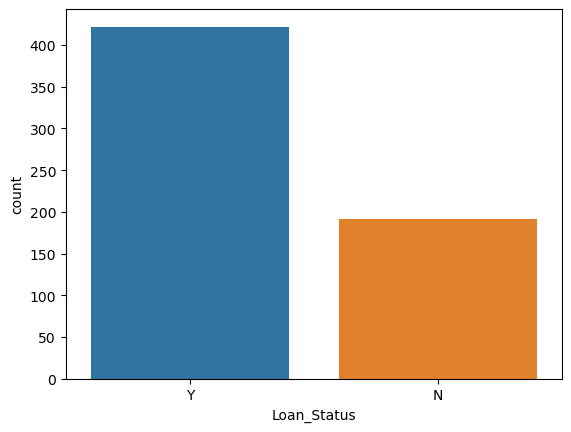

In [11]:
sns.countplot(x="Loan_Status",data=df)
plt.show()

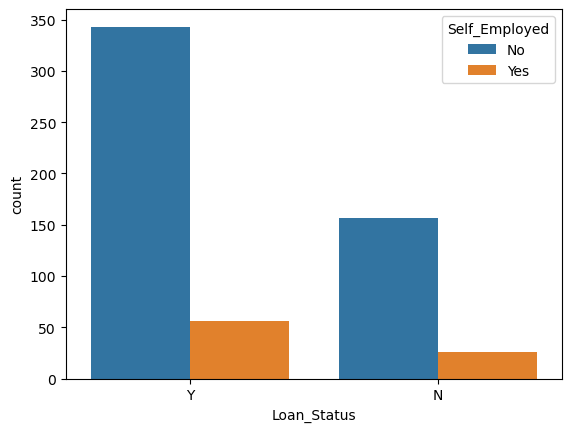

In [12]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)
plt.show()

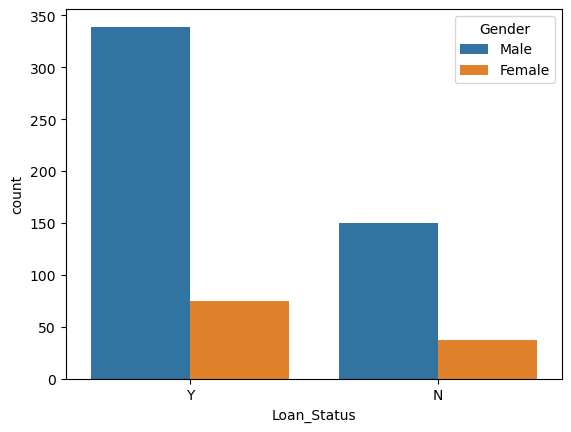

In [11]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

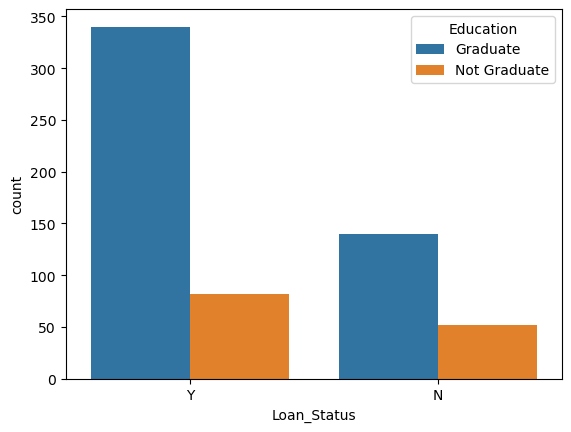

In [13]:
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

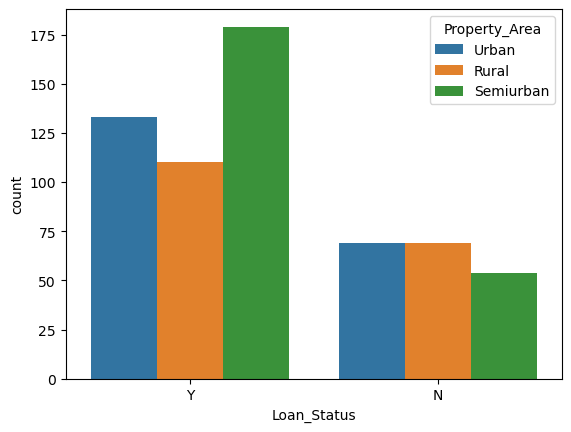

In [13]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

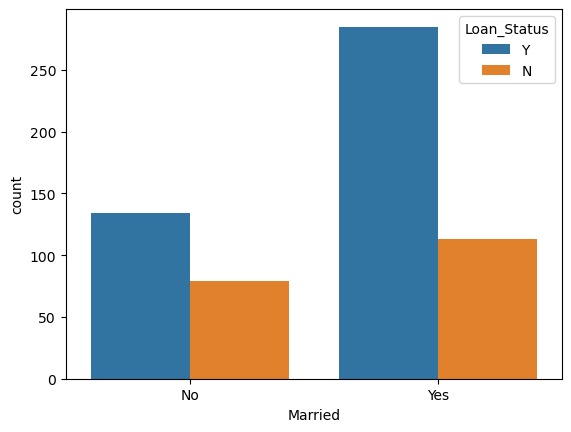

In [14]:
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

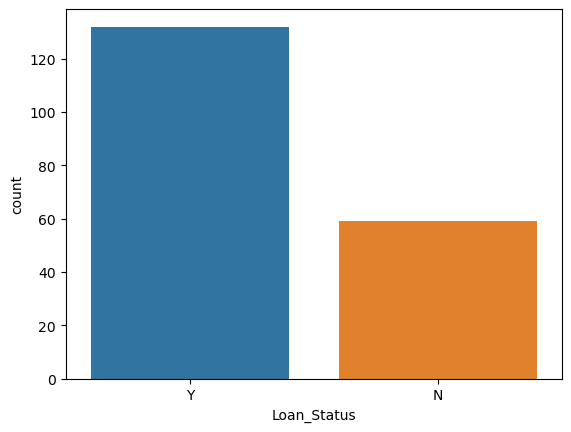

In [15]:
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000])
plt.show()

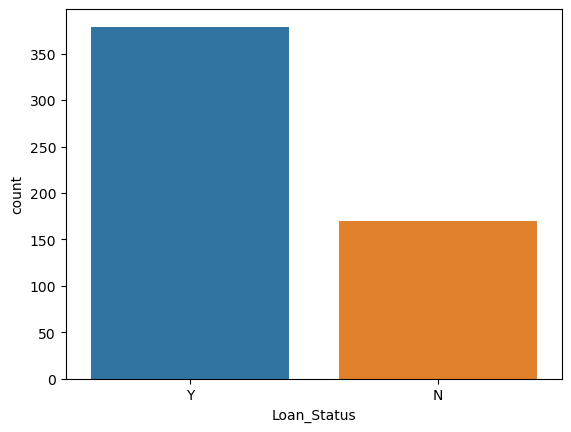

In [16]:
sns.countplot(x="Loan_Status",data=df.loc[(df["ApplicantIncome"]>5000)&df["CoapplicantIncome"]==0])
plt.show()

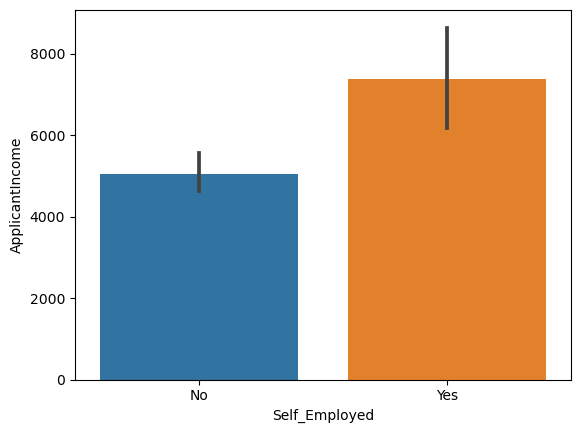

In [17]:
sns.barplot(x="Self_Employed",y="ApplicantIncome",data=df)
plt.show()

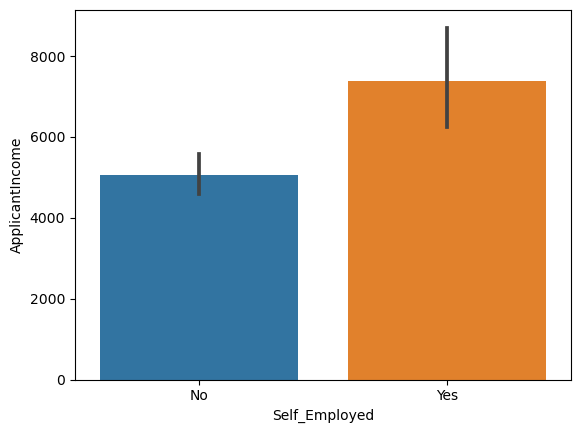

In [18]:
sns.barplot(x="Self_Employed",y="ApplicantIncome",data=df)
plt.show()

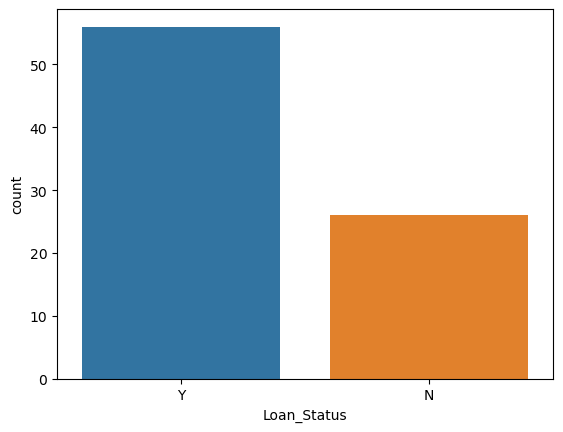

In [19]:
sns.countplot(x="Loan_Status",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

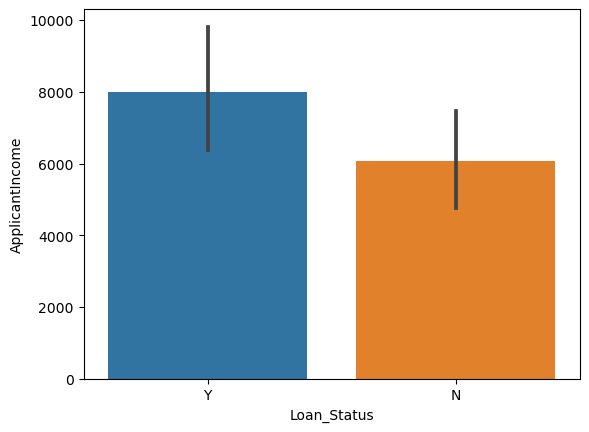

In [20]:
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=df.loc[df["Self_Employed"]=="Yes"])
plt.show()

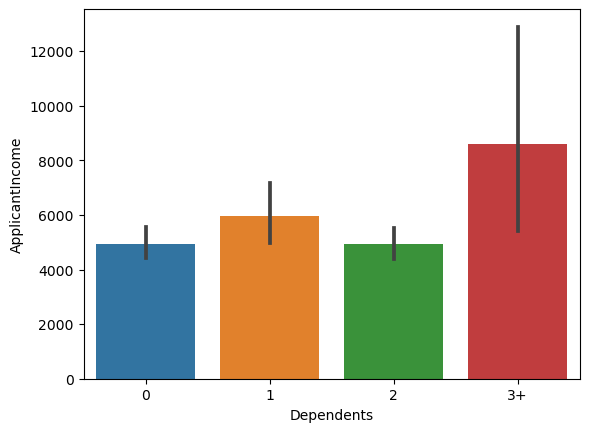

In [21]:
sns.barplot(x="Dependents",y="ApplicantIncome",data=df)
plt.show()

C:\Users\AM\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


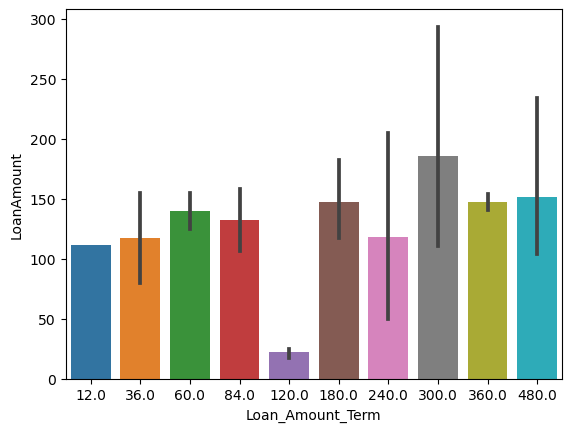

In [14]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)
plt.show()

In [15]:
for col in df.columns:
    print("Column data type:",df[col].dtype,"Column name:","Null values:",df[col].isnull)

Column data type: object Column name: Null values: <bound method Series.isnull of 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object>
Column data type: object Column name: Null values: <bound method Series.isnull of 0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>
Column data type: object Column name: Null values: <bound method Series.isnull of 0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object>
Column data type: object Column name: Null values: <bound method Series.isnull of 0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612

In [16]:
for col in df.columns:
    if df[col].dtype=="object"and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",col].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])
        
                                                    

In [17]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            6
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.loc[df["Loan_Status"]=="Y",["LoanAmount"]]=df.loc[df["Loan_Status"]=="Y",["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=="Y",["LoanAmount"]].mean())
df.loc[df["Loan_Status"]=="N",["LoanAmount"]]=df.loc[df["Loan_Status"]=="N",["LoanAmount"]].fillna(df.loc[df["Loan_Status"]=="N",["LoanAmount"]].mean())


In [29]:
df.isnull().sum()


Loan_ID               0
Gender                5
Married               0
Dependents            6
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df.skew()

C:\Users\AM\AppData\Local\Temp\ipykernel_13028\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.724592
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [33]:
df_x=df.drop(columns=["Loan_Status"])
y=df[["Loan_Status"]]

In [34]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])

C:\Users\AM\AppData\Local\Temp\ipykernel_13028\2332190938.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  for index in df_x.skew().index:
C:\Users\AM\AppData\Local\Temp\ipykernel_13028\2332190938.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  if df_x.skew().loc[index]>0.5:
C:\Users\AM\AppData\Local\Temp\ipykernel_13028\2332190938.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. S

In [35]:
df_x.skew()

C:\Users\AM\AppData\Local\Temp\ipykernel_13028\754224777.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_x.skew()


ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.181343
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [36]:
df_x.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [38]:
df_x.drop(columns=["Loan_ID"],inplace=True)

In [39]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [40]:
df_x.shape

(614, 14)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\Users\AM\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AM\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf=GridSearchCV(rf_clf,parameters,cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf=GridSearchCV(kc, neighbors,cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [60]:
kc=KNeighborsClassifier(n_neighbors=29)
max_aucroc_score(kc,x,y)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'